In [1]:
%matplotlib inline

from IPython.display import clear_output
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from dataset import *
from tqdm import tqdm

from CDP_test_diff_K_real import test_diff_k

def plot_rec(x_test_rec,x_test,n_test,psnr_x):
    x_test = np.squeeze(x_test)
    _, height, width = x_test.shape
    
    # display GT
    n = np.min([10,n_test])
    figset = range(0,n)
    plt.figure(figsize=(n*2, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(x_test[figset[i]].reshape(height, width))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    n_recs = len(x_test_rec)
    for m in range(n_recs):
        psnr_list = psnr_x[:,10*(m+1)-1]
        rec = x_test_rec[m]
        n = np.min([10,n_test])
        figset = range(0,n)
        plt.figure(figsize=(n*2, 4))
        for i in range(n):
            # display reconstructionmake_complex_data_1phase
            ax = plt.subplot(1, n, i + 1)
            plt.imshow(rec[figset[i]].reshape(height, width))
            plt.title(f'{psnr_list[i]:.2f}')
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

cuda


In [2]:
x_train, x_test = load_CELEBA(200)
n_test  = 1000
n_batch = 8

using Gray image
Loaded CELEBA gray dataset: x_train(200, 200, 200), x_valid(1000, 200, 200)


In [3]:
dataset = 'celeba'
n_masks = 4
alpha = 4/n_masks
mask_path_learned = f'masks/{dataset}_learned_{n_masks}.npy'
mask_path_random = f'masks/{dataset}_random_{n_masks}.npy'
mask1 = np.load(mask_path_learned)
mask2 = np.load(mask_path_random)

In [6]:
n_steps = 200
rec_save_step = 25
loss_x1,psnr_x1,loss_y1,x_test_rec1 = test_diff_k(mask1,alpha,x_test,n_test,n_batch,n_steps,rec_save_step = rec_save_step)
loss_x2,psnr_x2,loss_y2,x_test_rec2 = test_diff_k(mask2,alpha,x_test,n_test,n_batch,n_steps,rec_save_step = rec_save_step)
print(f'avg psnr1: {np.mean(psnr_x1[:,-1]):.2f}')
print(f'avg psnr2: {np.mean(psnr_x2[:,-1]):.2f}')
# plot_rec(x_test_rec,x_test,n_test,psnr_x)

100%|██████████| 125/125 [04:18<00:00,  2.07s/it]

avg psnr1: 140.82
avg psnr2: 32.30


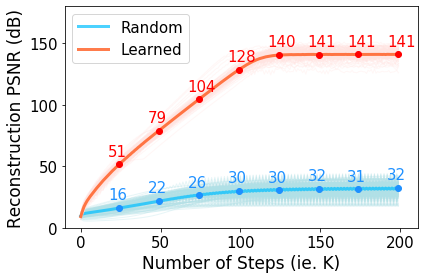

In [8]:
text_font = 'normal'
num_size = 15
text_size = 17

plt.figure(figsize=(6,4))
# random
plt.plot(psnr_x2[:100].T,color='powderblue',alpha=0.3,lw=1)
avg_psnr_x2 = np.mean(psnr_x2,axis=0)
x_list = np.arange(n_steps)[rec_save_step-1::rec_save_step]
y_list = avg_psnr_x2[rec_save_step-1::rec_save_step]
plt.plot(avg_psnr_x2,color='deepskyblue',label = 'Random',alpha=0.7,lw=3)
plt.scatter(x_list,y_list,color='dodgerblue', zorder=3)
for x,y in zip(x_list,y_list):
    plt.text(x-7,y+7,f'{y:.0f}',color='dodgerblue',fontsize=num_size)

# learned
plt.plot(psnr_x1[:100].T,color='mistyrose',alpha=0.3,lw=1)
avg_psnr_x1 = np.mean(psnr_x1,axis=0)
x_list = np.arange(n_steps)[rec_save_step-1::rec_save_step]
y_list = avg_psnr_x1[rec_save_step-1::rec_save_step]
plt.plot(avg_psnr_x1,color='orangered',label = 'Learned',alpha=0.7,lw=3)
plt.scatter(x_list,y_list,color='red', zorder=3)
for x,y in zip(x_list,y_list):
    plt.text(x-7,y+7,f'{y:.0f}',color='red',fontsize=num_size)

plt.xlabel('Number of Steps (ie. K)', size = text_size)
plt.ylabel('Reconstruction PSNR (dB)', size = text_size)
# plt.grid(True)
plt.rc('xtick',labelsize=num_size)
plt.rc('ytick',labelsize=num_size)
plt.ylim(0, 180)

plt.legend(fontsize=num_size)
plt.tight_layout()
plt.show()